In [1]:
# importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# file paths
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

# reading .csv files to convert them to DataFrames
mouse = pd.read_csv(mouse_path)
study = pd.read_csv(study_path)

# inner-merging DataFrames mouse and study so that
# every result is associated with a mouse.
complete = study.merge(mouse, how="left", on="Mouse ID")

# displaying DataFrame
complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# no null values in DataFrame, no need to dropna()
# total of 1893 results
complete.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [3]:
# checking number of mice
len(mouse)

249

In [4]:
# checking how many times each mouse is recorded
# seems that mouse g989 has duplicate recordings
complete[["Mouse ID", "Timepoint"]].value_counts().head(20)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
q633      20           1
          25           1
q610      15           1
q597      45           1
q610      5            1
dtype: int64

In [5]:
# making a renewed complete DF (DataFrame complete without mouse g989)
clean = complete[complete["Mouse ID"] != "g989"]
clean.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# checking that mouse g989 has been dropped
clean["Mouse ID"].nunique()

248

## SUMMARY STATISTICS

In [7]:
# creating a table of mean, median, variance, standard deviation and SEM

# creating an empty dictionary with to-be-columns as keys to store data
summary_dict = {"Drug Regimen": None, "Mean Tumor Volume": None, 
                "Median Tumor Volume": None, "Tumor Volume Variance": None,
                "Tumor Volume Std. Dev.": None, "Tumor Volume Std. Err.": None}

# filling drug regiment key with list of unique treatments
treatment_list = list(clean["Drug Regimen"].unique())
summary_dict["Drug Regimen"] = treatment_list
    
# filling mean key with mean of each regiment 
tumor_mean = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_dict["Mean Tumor Volume"] = tumor_mean.tolist()

# filling median key with median of each regiment 
tumor_median = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_dict["Median Tumor Volume"] = tumor_median.tolist()

# filling variance key with variance of each regiment 
tumor_var = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_dict["Tumor Volume Variance"] = tumor_var.tolist()

# filling std. dev. key with std. dev. of each regiment 
tumor_std = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_dict["Tumor Volume Std. Dev."] = tumor_std.tolist()

# filling std. err. key with std. err. of each regiment
# using apply() and lambda function as std. err. function comes from SciPy, not NumPy
tumor_sem = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(lambda x: st.sem(x))
summary_dict["Tumor Volume Std. Err."] = tumor_sem.tolist()

# converting list to DataFrame
summary_df = pd.DataFrame(summary_dict)
summary_df.set_index("Drug Regimen", inplace=True)

# displaying DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,52.591172,51.776157,39.290177,6.268188,0.469821
Naftisol,52.884795,51.820584,43.128684,6.567243,0.492236
Infubinol,55.235638,53.698743,68.553577,8.279709,0.603860
Stelasyn,54.331565,52.509285,66.173479,8.134708,0.596466
Ramicane,54.033581,52.288934,61.168083,7.821003,0.581331
Zoniferol,52.320930,50.446266,43.852013,6.622085,0.544332
Propriva,40.216745,40.673236,23.486704,4.846308,0.320955
Placebo,54.233149,52.431737,59.450562,7.710419,0.573111


## BAR AND PIE CHARTS

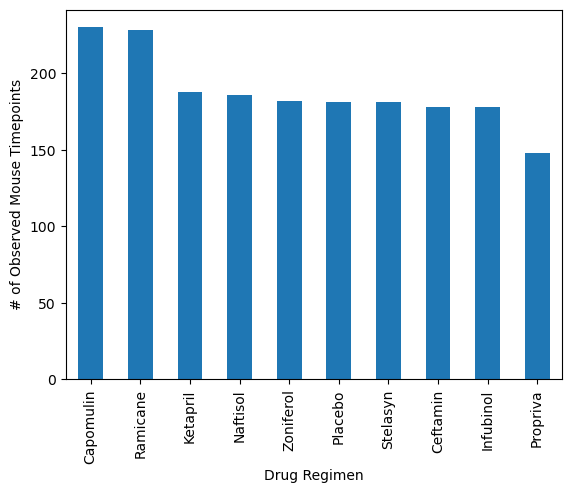

In [8]:
# bar - using DataFrame.plot()

# creating new DataFrame containing only drug regimen and count of timepoints recorded
drug_timepoint_count = clean.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False).to_frame()

# creating bar chart using the new DataFrame
drug_timepoint_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.legend().remove()
plt.show()

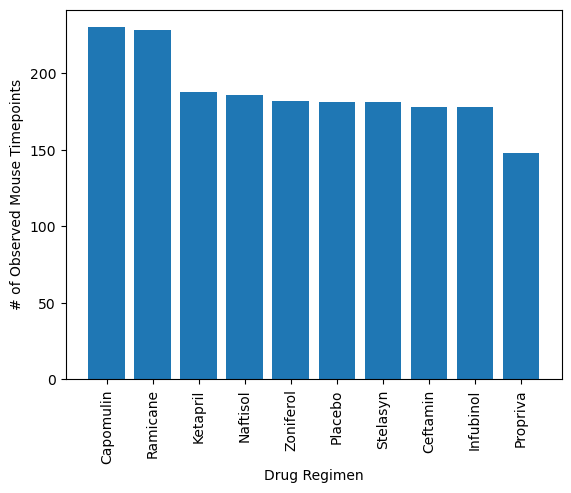

In [9]:
# bar - using pyplot

# creating x and y values, and also list of drug regimens
x_axis = np.arange(len(drug_timepoint_count["Mouse ID"]))
count = drug_timepoint_count["Mouse ID"]

drc_ri = drug_timepoint_count.reset_index()
drug_list = drc_ri["Drug Regimen"]

# creating bar chart using DataFrame drug_timepoint_count
plt.bar(x_axis, count)
plt.xticks(x_axis, drug_list, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

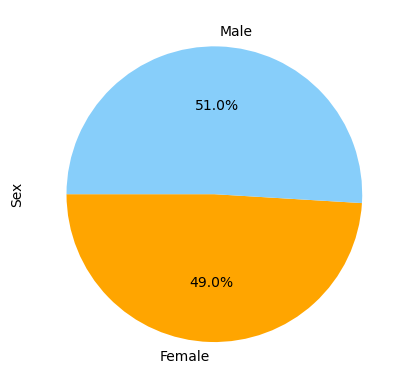

In [10]:
# pie - using DataFrame.plot()

# creating new DataFrame containing amount of male and female mice
sex_count = clean.groupby("Sex")["Mouse ID"].count().to_frame()

# creating pie chart with DataFrame sex_count
sex_count.plot(kind="pie", subplots=True, colors=['orange', 'lightskyblue'], startangle=180, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.legend().remove()
plt.show()

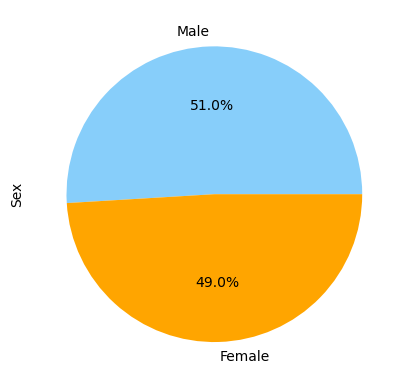

In [11]:
# pie - using pyplot

# creating labels
labels = ["Male", "Female"]

# creating sizes
sizes = [clean.groupby("Sex")["Mouse ID"].count()["Male"], 
         clean.groupby("Sex")["Mouse ID"].count()["Female"]]

# assigning colours
colours = ['lightskyblue', 'orange']

# creating pie chart
plt.pie(sizes, labels=labels, colors=colours, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## QUARTILES, OUTLIERS AND BOXPLOTS

In [12]:
# sort Mouse ID in preparation of iteration
clean_mouse_sort = clean.sort_values(["Mouse ID", "Timepoint"], ascending=[True, True]).reset_index(inplace=False, drop=True)

# preparing variables needed for iteration
clean_mouse_sort_range = np.arange(0, len(clean_mouse_sort))
clean_mouse_sort_len = len(clean_mouse_sort) - 1

# creating empty lists to put results in
final_timepoint = []

# iterating through clean_mouse_sort DataFrame so that final_timepoint
# is always filled with the last entry of each mouse, which due to
# the sort done before, will be also the final timepoint for each mouse.
for row in clean_mouse_sort_range:
    if row < clean_mouse_sort_len:
        if clean_mouse_sort.iloc[row, 0] != clean_mouse_sort.iloc[row+1, 0]:
            final_timepoint.append(clean_mouse_sort.iloc[row, :].to_dict())
        else:
            continue
    else:
        final_timepoint.append(clean_mouse_sort.iloc[clean_mouse_sort_len, :].to_dict())
        break
        
ft_df = pd.DataFrame(final_timepoint)
ft_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


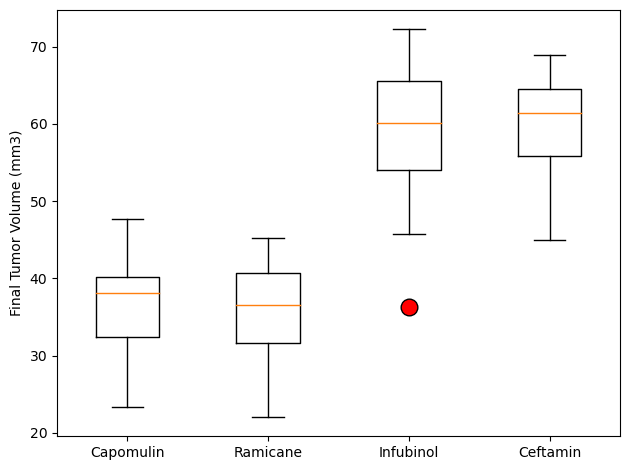

In [21]:
# creating list of final tumor volume of each mouse
# under each of the 4 most promising treatments
capomulin = ft_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].unique()["Capomulin"]
ramicane = ft_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].unique()["Ramicane"]
infubinol = ft_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].unique()["Infubinol"]
ceftamin = ft_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].unique()["Ceftamin"]

# setting up how outliers are seen in final result
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none')

# setting up boxplots
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin], flierprops=flierprops)
ax1.set_xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.tight_layout()

#showing boxplots
plt.show()

In [14]:
# calculating upper and lower bound for each drug
# q=quantile list, lq=lower quantile, uq=upper quantile, iqr=IQR,
# lb=lower bound, ub=upper_bound

# capomulin
ca_df = pd.DataFrame(capomulin)

outlier_list = []

q = ca_df.quantile([.25, .5, .75])
lq = q.iloc[0, 0]
uq = q.iloc[2, 0]
iqr = uq - lq
lb = lq - (1.5*iqr)
ub = uq + (1.5*iqr)

for value in ramicane:
    if value < lb or value > ub:
        outlier_list.append(value)
    else:
        continue
            
print("Capomulin's potential outliers: " + str(outlier_list))

# ramicane
ra_df = pd.DataFrame(ramicane)

outlier_list = []

q = ra_df.quantile([.25, .5, .75])
lq = q.iloc[0, 0]
uq = q.iloc[2, 0]
iqr = uq - lq
lb = lq - (1.5*iqr)
ub = uq + (1.5*iqr)

for value in ramicane:
    if value < lb or value > ub:
        outlier_list.append(value)
    else:
        continue
            
print("Ramicane's potential outliers: " + str(outlier_list))

# ramicane
in_df = pd.DataFrame(infubinol)

outlier_list = []

q = in_df.quantile([.25, .5, .75])
lq = q.iloc[0, 0]
uq = q.iloc[2, 0]
iqr = uq - lq
lb = lq - (1.5*iqr)
ub = uq + (1.5*iqr)

for value in infubinol:
    if value < lb or value > ub:
        outlier_list.append(value)
    else:
        continue
            
print("Infubinol's potential outliers: " + str(outlier_list))

# ceftamin
ce_df = pd.DataFrame(ceftamin)

outlier_list = []

q = ce_df.quantile([.25, .5, .75])
lq = q.iloc[0, 0]
uq = q.iloc[2, 0]
iqr = uq - lq
lb = lq - (1.5*iqr)
ub = uq + (1.5*iqr)

for value in ceftamin:
    if value < lb or value > ub:
        outlier_list.append(value)
    else:
        continue
            
print("Ceftamin's potential outliers: " + str(outlier_list))


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


Notes: 
- I have no idea how to rectify Infubinol's outlier output, but it seems to be related to the previous cell.
- I know that I could make this a function, I just don't know how to make it make sense. It's more time efficient for me to do it manually at this stage.

## LINE AND SCATTER PLOTS

In [15]:
# creating DataFrame with only mice treated with Capomulin
capomulin_mice = clean[clean["Drug Regimen"] == "Capomulin"]

# deciding on what mouse to focus on
capomulin_mice.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22


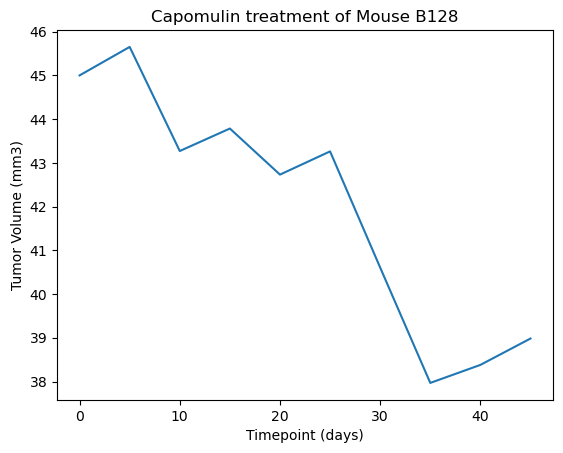

In [16]:
# creating DataFrame specific to the progress of mouse B128
b128_log = clean[clean["Mouse ID"] == "b128"]
b128_log.set_index("Timepoint", drop=True, inplace=True)

# creating DataFrame containing only timepoint and tumor volume
clean_b128_log = b128_log["Tumor Volume (mm3)"].to_frame()

# creating line plot
clean_b128_log.plot(kind="line")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse B128")
plt.legend().remove()
plt.show()

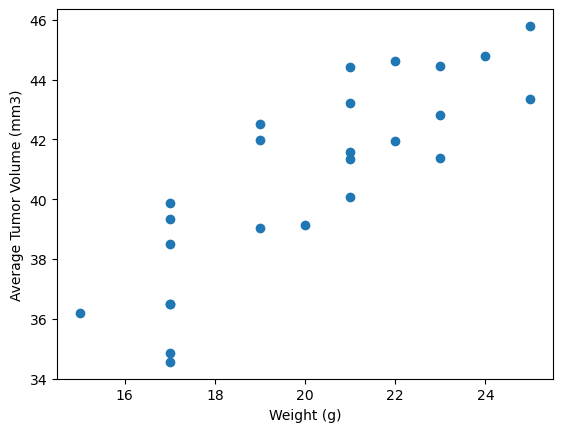

In [17]:
# creating DataFrame 
avg_tumor_vol = capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_avg_tumor_vol = mouse.merge(avg_tumor_vol, how="right", on="Mouse ID")

weight_tumor_vol = mouse_avg_tumor_vol[["Weight (g)", "Tumor Volume (mm3)"]]

# creating scatter plot
plt.scatter(weight_tumor_vol["Weight (g)"], weight_tumor_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## CORRELATION AND REGRESSION

The correlation between mouse weight and the average tumor volume is 0.84


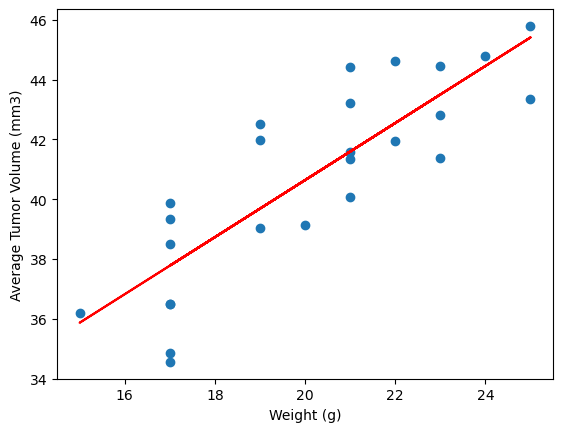

In [18]:
# creating linear regression model
x_values = weight_tumor_vol["Weight (g)"]
y_values = weight_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# determining correlation between both variables
corr = weight_tumor_vol["Weight (g)"].corr(weight_tumor_vol["Tumor Volume (mm3)"])
print("The correlation between mouse weight and the average tumor volume is " + 
        str(round(corr, 2)))

# creating scatter plot with linear regression model
plt.scatter(weight_tumor_vol["Weight (g)"], weight_tumor_vol["Tumor Volume (mm3)"])
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()